<a href="https://colab.research.google.com/github/MingyiXia9717/Neuromatch_summer_project_2021/blob/main/Neuromatch_summer_project_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neuromatch Academy Summer Project (July 2021)

#### **Group members**: Jimmy Pulido Arias, Joseph Gonzalez, Lourdes Baztan Bitopoulos, May Xia, Mark Zarutin

## Loading of Steinmetz data

includes some visualizations

In [ ]:
#@title Data retrieval
import os, requests

fname = []
for j in range(3):
  fname.append('steinmetz_part%d.npz'%j)
url = ["https://osf.io/agvxh/download"]
url.append("https://osf.io/uv3mw/download")
url.append("https://osf.io/ehmw2/download")

for j in range(len(url)):
  if not os.path.isfile(fname[j]):
    try:
      r = requests.get(url[j])
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        with open(fname[j], "wb") as fid:
          fid.write(r.content)


In [ ]:
#@title Import matplotlib and set defaults
from matplotlib import rcParams 
from matplotlib import pyplot as plt

rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

In [ ]:
#@title Data loading
import numpy as np

alldat = np.array([])
for j in range(len(fname)):
  alldat = np.hstack((alldat, np.load('steinmetz_part%d.npz'%j, allow_pickle=True)['dat']))

## Variable Explanation

`alldat` contains 39 sessions from 10 mice, data from Steinmetz et al, 2019. Time bins for all measurements are 10ms, starting 500ms before stimulus onset. The mouse had to determine which side has the highest contrast. For each `dat = alldat[k]`, you have the fields below. For extra variables, check out the extra notebook and extra data files (lfp, waveforms and exact spike times, non-binned). 

* `dat['mouse_name']`: mouse name
* `dat['date_exp']`: when a session was performed
* `dat['spks']`: neurons by trials by time bins.    
* `dat['brain_area']`: brain area for each neuron recorded. 
* `dat['ccf']`: Allen Institute brain atlas coordinates for each neuron. 
* `dat['ccf_axes']`: axes names for the Allen CCF. 
* `dat['contrast_right']`: contrast level for the right stimulus, which is always contralateral to the recorded brain areas.
* `dat['contrast_left']`: contrast level for left stimulus. 
* `dat['gocue']`: when the go cue sound was played. 
* `dat['response_times']`: when the response was registered, which has to be after the go cue. The mouse can turn the wheel before the go cue (and nearly always does!), but the stimulus on the screen won't move before the go cue.  
* `dat['response']`: which side the response was (`-1`, `0`, `1`). When the right-side stimulus had higher contrast, the correct choice was `-1`. `0` is a no go response. 
* `dat['feedback_time']`: when feedback was provided. 
* `dat['feedback_type']`: if the feedback was positive (`+1`, reward) or negative (`-1`, white noise burst).  
* `dat['wheel']`: turning speed of the wheel that the mice uses to make a response, sampled at `10ms`. 
* `dat['pupil']`: pupil area  (noisy, because pupil is very small) + pupil horizontal and vertical position.
* `dat['face']`: average face motion energy from a video camera. 
* `dat['licks']`: lick detections, 0 or 1.   
* `dat['trough_to_peak']`: measures the width of the action potential waveform for each neuron. Widths `<=10` samples are "putative fast spiking neurons". 
* `dat['%X%_passive']`: same as above for `X` = {`spks`, `pupil`, `wheel`, `contrast_left`, `contrast_right`} but for  passive trials at the end of the recording when the mouse was no longer engaged and stopped making responses. 
* `dat['prev_reward']`: time of the feedback (reward/white noise) on the previous trial in relation to the current stimulus time. 
* `dat['reaction_time']`: ntrials by 2. First column: reaction time computed from the wheel movement as the first sample above `5` ticks/10ms bin. Second column: direction of the wheel movement (`0` = no move detected).  




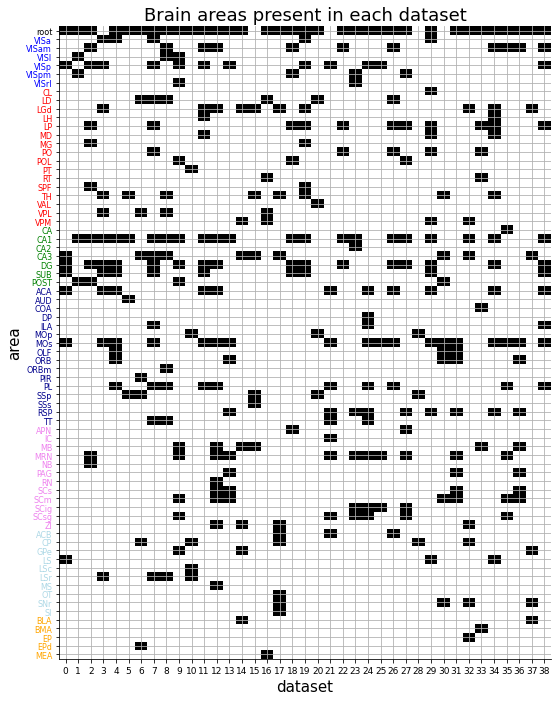

In [ ]:
# @title Make a plot of which brain areas are present in each dataset
regions = ["vis ctx", "thal", "hipp", "other ctx", "midbrain", "basal ganglia", "cortical subplate", "other"]
region_colors = ['blue', 'red', 'green', 'darkblue', 'violet', 'lightblue', 'orange', 'gray']
brain_groups = [["VISa", "VISam", "VISl", "VISp", "VISpm", "VISrl"], # visual cortex
                ["CL", "LD", "LGd", "LH", "LP", "MD", "MG", "PO", "POL", "PT", "RT", "SPF", "TH", "VAL", "VPL", "VPM"], # thalamus
                ["CA", "CA1", "CA2", "CA3", "DG", "SUB", "POST"], # hippocampal
                ["ACA", "AUD", "COA", "DP", "ILA", "MOp", "MOs", "OLF", "ORB", "ORBm", "PIR", "PL", "SSp", "SSs", "RSP","TT"], # non-visual cortex
                ["APN", "IC", "MB", "MRN", "NB", "PAG", "RN", "SCs", "SCm", "SCig", "SCsg", "ZI"], # midbrain
                ["ACB", "CP", "GPe", "LS", "LSc", "LSr", "MS", "OT", "SNr", "SI"], # basal ganglia 
                ["BLA", "BMA", "EP", "EPd", "MEA"] # cortical subplate
                ]

# Assign each area an index
area_to_index = dict(root=0)
counter = 1
for group in brain_groups:
    for area in group:
        area_to_index[area] = counter
        counter += 1

# Figure out which areas are in each dataset
areas_by_dataset = np.zeros((counter, len(alldat)), dtype=bool)
for j, d in enumerate(alldat):
    for area in np.unique(d['brain_area']):
        i = area_to_index[area]
        areas_by_dataset[i, j] = True

# Show the binary matrix
plt.figure(figsize=(8, 10))
plt.imshow(areas_by_dataset, cmap="Greys", aspect="auto", interpolation="none")

# Label the axes
plt.xlabel("dataset")
plt.ylabel("area")

# Add tick labels
yticklabels = ["root"]
for group in brain_groups:
    yticklabels.extend(group)
plt.yticks(np.arange(counter), yticklabels, fontsize=8)
plt.xticks(np.arange(len(alldat)), fontsize=9)

# Color the tick labels by region
ytickobjs = plt.gca().get_yticklabels()
ytickobjs[0].set_color("black")
counter = 1
for group, color in zip(brain_groups, region_colors):
    for area in group:
        ytickobjs[counter].set_color(color)
        counter += 1

plt.title("Brain areas present in each dataset")
plt.grid(True)

### **PCA and Multiple Linear Regression Model**

In [ ]:
import numpy as np

### **Group all spikes and wheel data into two arrays by Brain Area**


### Version 1: select one brain area

In [ ]:
def groupByBrain(brainArea):
  """ Input the brain area and this will find and group spikes and wheel for this brain area
      unlike first iteration creates additional neurons and first shape is the total number of neurons
      but during different trials some neurons are 0s (not used during trial)
  """

  spikes=[]
  spikes=np.asarray(spikes)
  wheel=[]
  wheel=np.asarray(wheel)
  maxdim=0
  for i in range(len(alldat)):
    dat=alldat[i]
    brain_area=dat["brain_area"]
    uniq=np.unique(brain_area)
    if brainArea in uniq:
      tempS=dat["spks"][brain_area==brainArea]
      maxdim+=tempS.shape[0]
  alreadyDone=0
  for i in range(len(alldat)):
    dat=alldat[i]
    brain_area=dat["brain_area"]
    uniq=np.unique(brain_area)
    if brainArea not in uniq:
      continue
    else:
      tempW=dat["wheel"]
      tempS=dat["spks"][brain_area==brainArea]      
      alreadyDone+=tempS.shape[0]
      if wheel.size == 0:
        wheel=tempW
        tempS=np.pad(tempS,[(0,maxdim-alreadyDone),(0,0),(0,0)], 'constant', constant_values=0)
        spikes=tempS
        prevS=dat["spks"][brain_area==brainArea].shape[0]
      else:
        tempS=np.pad(tempS,[(alreadyDone-tempS.shape[0],maxdim-alreadyDone),(0,0),(0,0)], 'constant', constant_values=0)
        wheel=np.concatenate((wheel,tempW),axis=1)
        spikes=np.concatenate((spikes, tempS), axis=1)
             
        prevS=dat["spks"][brain_area==brainArea].shape[0]
  return spikes, wheel


### Version 2: select multiple brain areas

In [ ]:
def groupByBrains(brainAreas):
  """ Input the brain area and this will find and group spikes and wheel for this brain area
      unlike first iteration creates additional neurons and first shape is the total number of neurons
      but during different trials some neurons are 0s (not used during trial)
  """

  spikes=[]
  spikes=np.asarray(spikes)
  wheel=[]
  wheel=np.asarray(wheel)
  maxdim=0
  for i in range(len(alldat)):
    dat=alldat[i]
    brain_area=dat["brain_area"]
    uniq=np.unique(brain_area)
    for i in range(len(brainAreas)):  
      if brainAreas[i] in uniq:
        tempS=dat["spks"][brain_area==brainAreas[i]]
        maxdim+=tempS.shape[0]
  alreadyDone=0
  for i in range(len(alldat)):
    dat=alldat[i]
    brain_area=dat["brain_area"]
    uniq=np.unique(brain_area)
    for i in range(len(brainAreas)):  
      if brainAreas[i] not in uniq:
        continue
      else:
        tempW=dat["wheel"]
        tempS=dat["spks"][brain_area==brainAreas[i]]      
        alreadyDone+=tempS.shape[0]
        if wheel.size == 0:
          wheel=tempW
          tempS=np.pad(tempS,[(0,maxdim-alreadyDone),(0,0),(0,0)], 'constant', constant_values=0)
          spikes=tempS
          prevS=dat["spks"][brain_area==brainAreas[i]].shape[0]
        else:
          tempS=np.pad(tempS,[(alreadyDone-tempS.shape[0],maxdim-alreadyDone),(0,0),(0,0)], 'constant', constant_values=0)
          wheel=np.concatenate((wheel,tempW),axis=1)
          spikes=np.concatenate((spikes, tempS), axis=1)   
          prevS=dat["spks"][brain_area==brainAreas[i]].shape[0]
  return spikes, wheel

### **PCA & t-SNE on neuron spiking data**

In [ ]:
from sklearn.decomposition import PCA 
dat=alldat[10]
spk_data=dat["spks"]
print(spk_data.shape)

(857, 342, 250)


**Smooth data with Gaussian kernel**

In [ ]:
from scipy.ndimage.filters import gaussian_filter1d

new_spk_data = np.zeros(spk_data.shape)
#first loop through all the neurons, then loop through all the trials
for i in range(spk_data.shape[0]):
  for j in range(spk_data.shape[1]):
      new_spk_data[i,j,:] = gaussian_filter1d(spk_data[i,j,:].astype('float'), 10)


In [ ]:
print(new_spk_data.shape)

(857, 342, 250)


In [ ]:
#flatten trial dimension
spk_data_reshaped = new_spk_data.reshape(857, 342*250)

# Initializes PCA
pca_model = PCA(n_components=2)

# Performs PCA
pca_model.fit(spk_data_reshaped)
scores = pca_model.transform(spk_data_reshaped)

#### Visualize principal components by brain area

In [ ]:
def visualize_components(component1, component2, labels, show=True):
  plt.figure()
  cmap = plt.cm.get_cmap('tab10')
  plt.scatter(x=component1, y=component2, c=labels, cmap=cmap,s=10,alpha=0.5)
  plt.xlabel('Component 1')
  plt.ylabel('Component 2')
  plt.colorbar(ticks=range(10))
  plt.clim(-0.5, 9.5)
  plt.xlim([-10,10])
  plt.ylim([-25,25])
  if show:
    plt.show()

**Create labels for brain region of each neuron**

In [ ]:
unique_brainregion=np.unique(dat['brain_area'])
print(unique_brainregion)
labels_forpca=[]
all_brainarea=dat['brain_area']
for i in range(len(all_brainarea)):
  if all_brainarea[i]=='CP':
    labels_forpca.append(1)
  elif all_brainarea[i]=='LSc':
    labels_forpca.append(2)
  elif all_brainarea[i]=='LSr':
    labels_forpca.append(3)
  elif all_brainarea[i]=='MOp':
    labels_forpca.append(4)
  elif all_brainarea[i]=='PT':
    labels_forpca.append(5)
  else:
    labels_forpca.append(6)
print(len(labels_forpca))
print(labels_forpca[1:10])

['CP' 'LSc' 'LSr' 'MOp' 'PT' 'root']
857
[4, 2, 4, 4, 4, 4, 2, 2, 4]


**Perform PCA and Plotting**

1: CP (Caudoputamen), 2: LSc (caudal part of lateral septal nucleus), 3: LSr (rostral dorsal part of lateral septal nucleus), 4: MOp (primary motor area), 5: PT (paratenial nucleus) , 6: root (noise)

(857, 2)


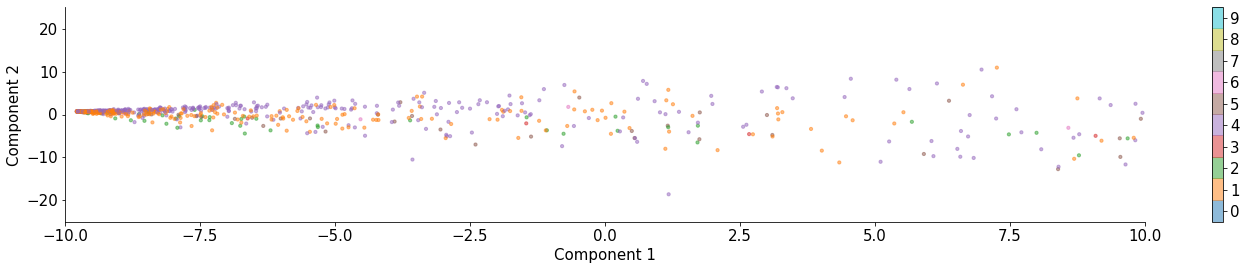

In [ ]:
# Perform PCA
scores = pca_model.transform(spk_data_reshaped)
print(scores.shape) 
# Plot the data and reconstruction
visualize_components(scores[:,0],scores[:,1],labels_forpca)

### **PCA with wheel velocity labels (focus on one specific brain area or 2 or more brain areas)**

In [ ]:
from sklearn.decomposition import PCA 
from scipy.ndimage.filters import gaussian_filter1d

In [ ]:
#visualizing function
def visualize_components_velocity(component1, component2, labels, trial_num_start,interval,brain_area,brain_area_fullname,show=True):
  plt.figure()
  cmap = plt.cm.get_cmap('coolwarm')
  plt.scatter(x=component1, y=component2, c=labels, cmap=cmap,s=20,alpha=0.6)
  plt.xlabel('Component 1')
  plt.ylabel('Component 2')
  plt.colorbar(ticks=range(-15,18,3))
  plt.clim(-15, 15)
  plt.autoscale()
  plt.title(brain_area_fullname+': Principal Components of Spiking Activity from Trial '+str(trial_num_start)+" to Trial "+str(trial_num_start+interval)+" with Velocity (cm/s) Labels")
  if show:
    plt.show()

In [ ]:
def pcaSpike_wheelvelocity(trial_num_start,interval,brain_area,brain_area_fullname):
  '''
  Run principal component analysis on spike data in one specific brain area/multiple brain areas
  output a visualization of the first 2 principal components with labels of wheel velocity
  trial_num_start:select which trial to start to be included in PCA
  interval: how many trials to include
  brain_area: list, one brain area or multiple brain areas
  '''
  dat=groupByBrains(brain_area) #select a brain area or multiple brain areas
  
  spk_data=dat[0]
  speed_data=dat[1]

  #smooth data with Gaussian kernel
  new_spk_data = np.zeros(spk_data.shape)
  #first loop through all the neurons, then loop through all the trials
  for i in range(spk_data.shape[0]):
    for j in range(spk_data.shape[1]):
      new_spk_data[i,j,:] = gaussian_filter1d(spk_data[i,j,:].astype('float'), 10)

  #select trials to be included in PCA
  spk_data_bytrial =new_spk_data[:,trial_num_start:trial_num_start+interval,:]
  spk_data_bytrial = np.reshape(spk_data_bytrial,(spk_data_bytrial.shape[0], spk_data_bytrial.shape[1]*spk_data_bytrial.shape[2]))
  print(spk_data_bytrial.shape)
  # Initializes PCA
  pca_model = PCA(0.8)

  # Performs PCA
  pca_model.fit(spk_data_bytrial.T)
  scores = pca_model.transform(spk_data_bytrial.T)
  print(scores.shape)
  #create velocity labels
  labels_velocity=speed_data[0,trial_num_start:trial_num_start+interval,:]

  # Plot the data and reconstruction
  visualize_components_velocity(scores[:,0],scores[:,1],labels_velocity,trial_num_start,interval,brain_area,brain_area_fullname)


**Call function**

(793, 1250)
(1250, 7)


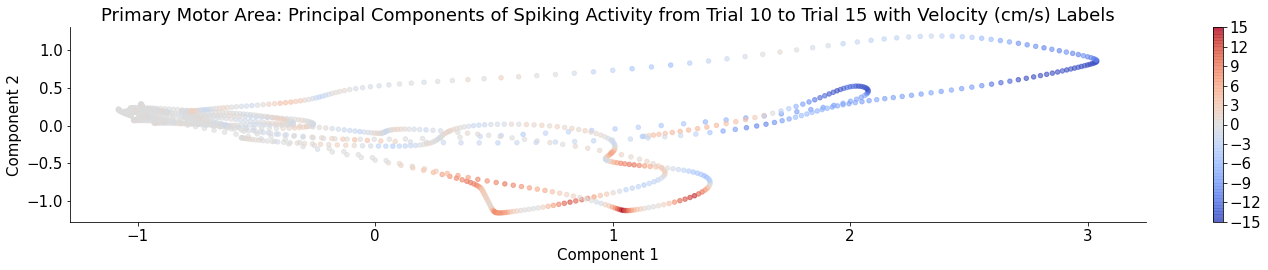

In [ ]:
pcaSpike_wheelvelocity(10,5,['MOp'],'Primary Motor Area')

(1215, 1250)
(1250, 4)


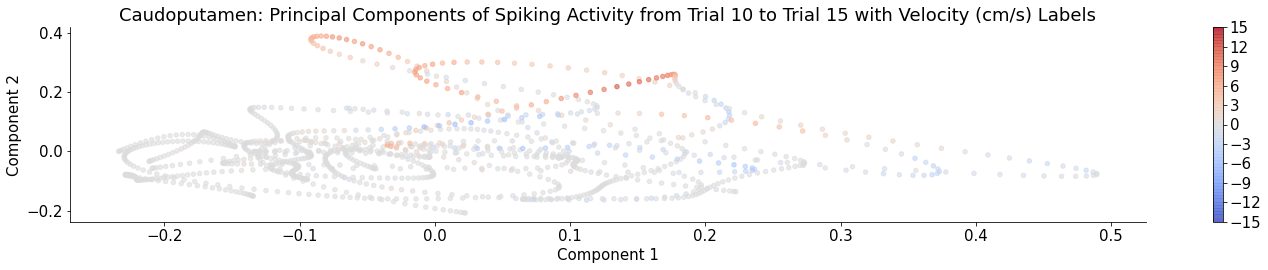

In [ ]:
pcaSpike_wheelvelocity(10,5,['CP'],'Caudoputamen')

(306, 1250)
(1250, 8)


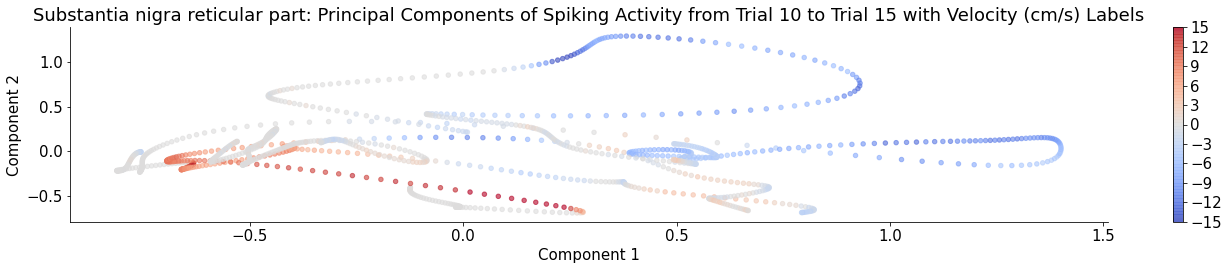

In [ ]:
pcaSpike_wheelvelocity(10,5,['SNr'],'Substantia nigra reticular part')

(1118, 1250)
(1250, 8)


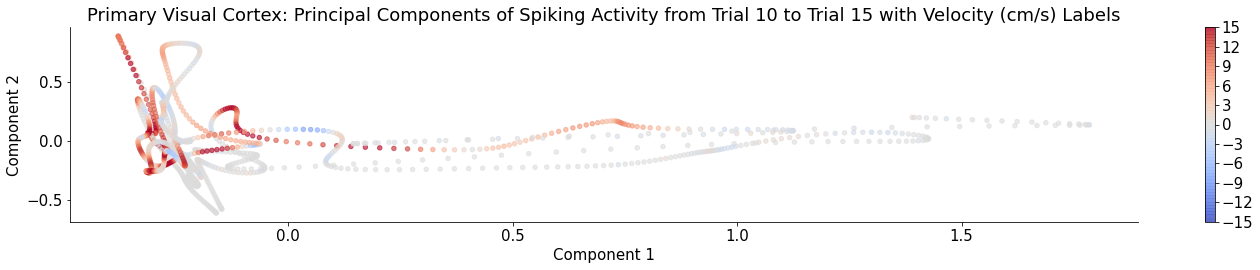

In [ ]:
pcaSpike_wheelvelocity(10,5,['VISp'],'Primary Visual Cortex')

(776, 1250)
(1250, 4)


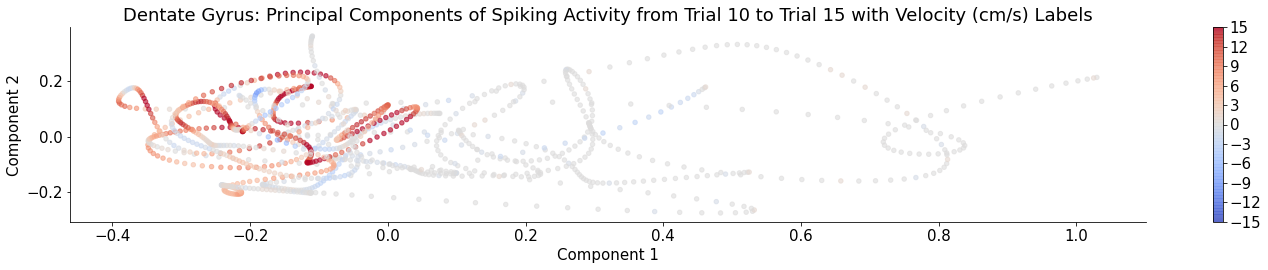

In [ ]:
pcaSpike_wheelvelocity(10,5,['DG'],'Dentate Gyrus')

**Examine two regions**

(2008, 1250)
(1250, 4)


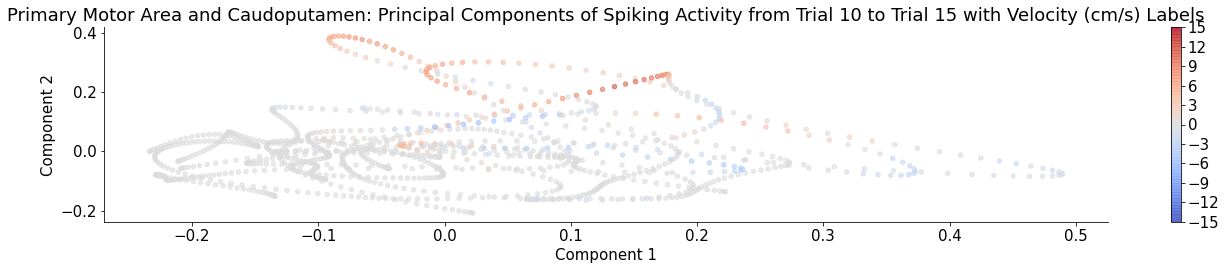

In [ ]:
pcaSpike_wheelvelocity(10,5,['MOp','CP'],'Primary Motor Area and Caudoputamen')

(1099, 1250)
(1250, 7)


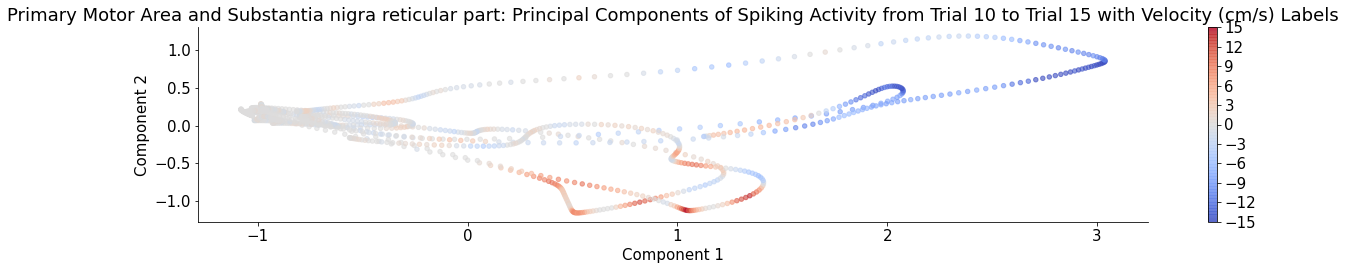

In [ ]:
pcaSpike_wheelvelocity(10,5,['MOp','SNr'],'Primary Motor Area and Substantia nigra reticular part')

(1521, 1250)
(1250, 4)


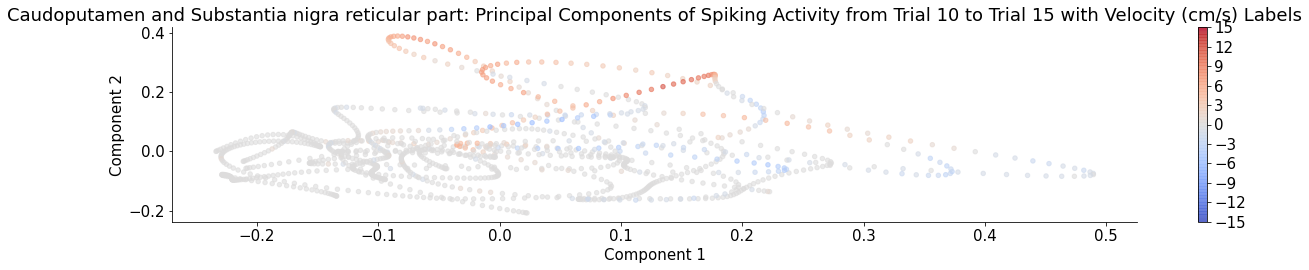

In [ ]:
pcaSpike_wheelvelocity(10,5,['CP','SNr'],'Caudoputamen and Substantia nigra reticular part')

### **Visualize different principal components**

In [ ]:
from sklearn.decomposition import PCA 
from scipy.ndimage.filters import gaussian_filter1d

In [ ]:
#visualizing function
def visualize_components_velocity_multiple(component1, component2, index1,index2,labels, trial_num_start,interval,brain_area,brain_area_fullname,show=True):
  plt.figure()
  cmap = plt.cm.get_cmap('coolwarm')
  plt.scatter(x=component1, y=component2, c=labels, cmap=cmap,s=20,alpha=0.6)
  plt.xlabel('PC '+str(index1))
  plt.ylabel('PC '+str(index2))
  plt.colorbar(ticks=range(-15,18,3))
  plt.clim(-15, 15)
  plt.autoscale()
  plt.title(brain_area_fullname+': Principal Components of Spiking Activity from Trial '+str(trial_num_start)+" to Trial "+str(trial_num_start+interval)+" with Velocity (cm/s) Labels")
  
  if show:
    plt.show()

In [ ]:
def pcaSpike_wheelvelocity_multiple(component_pairs,trial_num_start,interval,brain_area,brain_area_fullname):
  '''
  Run principal component analysis on spike data in one specific brain area
  output visualization of different principal components with labels of wheel velocity
  component pairs:list of pairs of PC's to plot
  '''
  dat=groupByBrains(brain_area) #select a brain area or multiple areas
  spk_data=dat[0]
  speed_data=dat[1]
  
  #smooth data with Gaussian kernel
  new_spk_data = np.zeros(spk_data.shape)
  #first loop through all the neurons, then loop through all the trials
  for i in range(spk_data.shape[0]):
    for j in range(spk_data.shape[1]):
      new_spk_data[i,j,:] = gaussian_filter1d(spk_data[i,j,:].astype('float'), 10)
  print(new_spk_data.shape)
  #select trials to be included in PCA
  spk_data_bytrial = new_spk_data[:,trial_num_start:(trial_num_start+interval),:]
  spk_data_bytrial = np.reshape(spk_data_bytrial,(spk_data_bytrial.shape[0], spk_data_bytrial.shape[1]*spk_data_bytrial.shape[2]))
  print(spk_data_bytrial.shape)
   
  # Initializes PCA
  pca_model = PCA(0.8)

  # Performs PCA
  pca_model.fit(spk_data_bytrial.T)
  scores = pca_model.transform(spk_data_bytrial.T)
  print(scores.shape)
  #create velocity labels
  labels_velocity=speed_data[0,trial_num_start:trial_num_start+interval,:]
  
  for i in range(len(component_pairs)):
    index1=component_pairs[i][0]
    index2=component_pairs[i][1]
    score1=scores[:,index1-1]
    score2=scores[:,index2-1]
    visualize_components_velocity_multiple(score1,score2,index1,index2,labels_velocity,trial_num_start,interval,brain_area,brain_area_fullname)


(793, 594, 250)
(793, 1250)
(1250, 7)


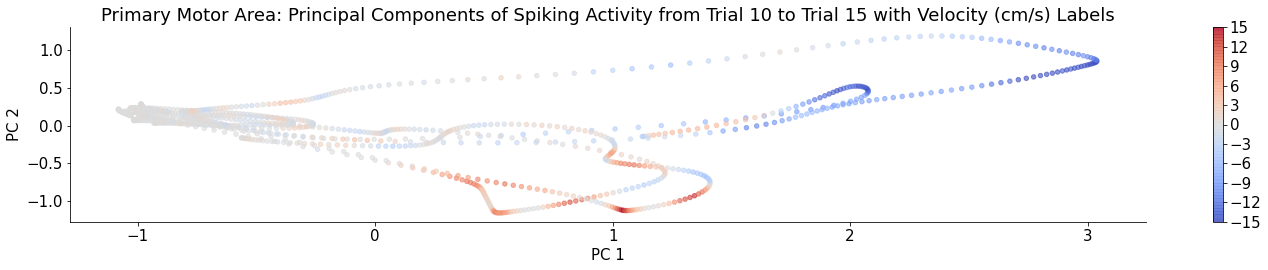

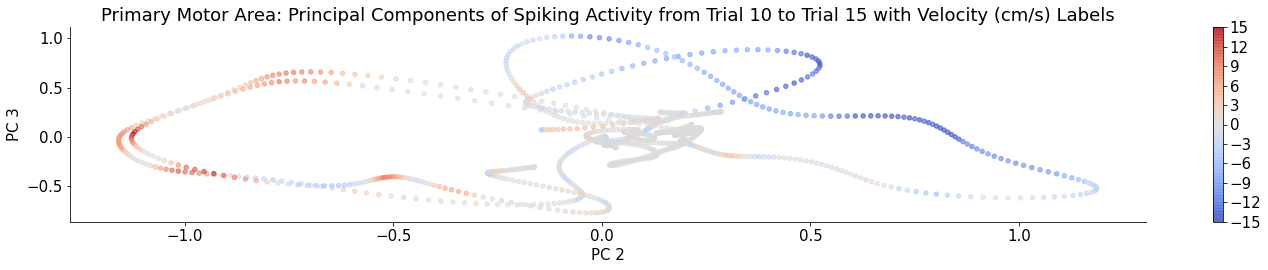

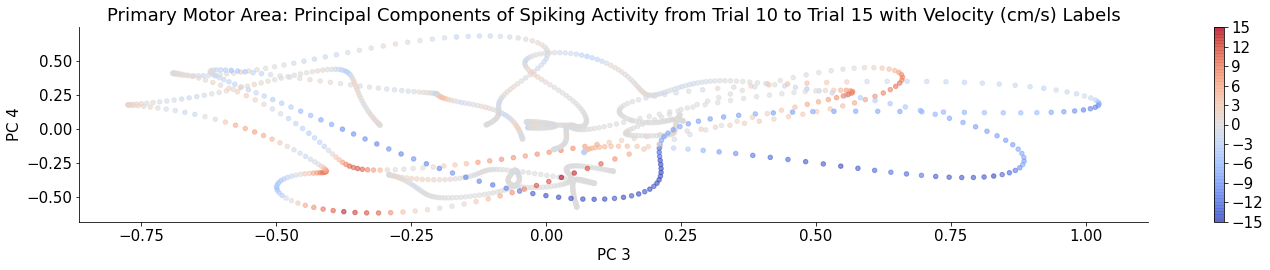

In [ ]:
pcaSpike_wheelvelocity_multiple([[1,2],[2,3],[3,4]],10,5,["MOp"],"Primary Motor Area")

(1215, 1229, 250)
(1215, 1250)
(1250, 4)


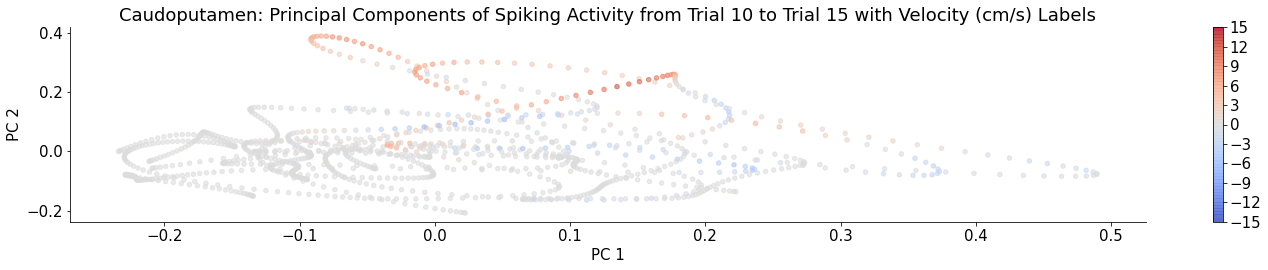

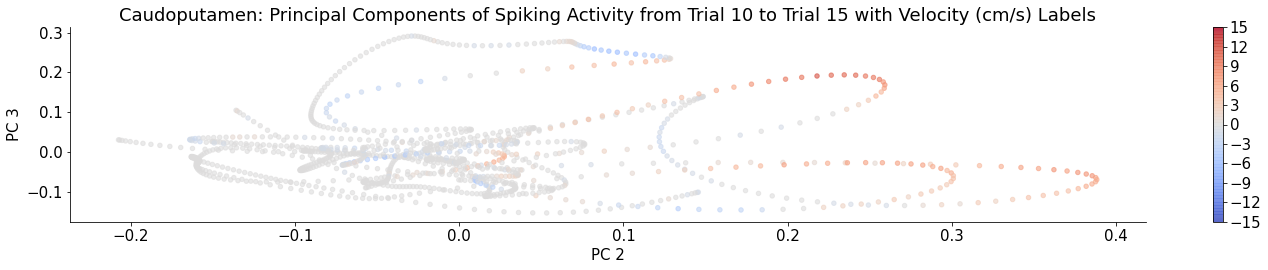

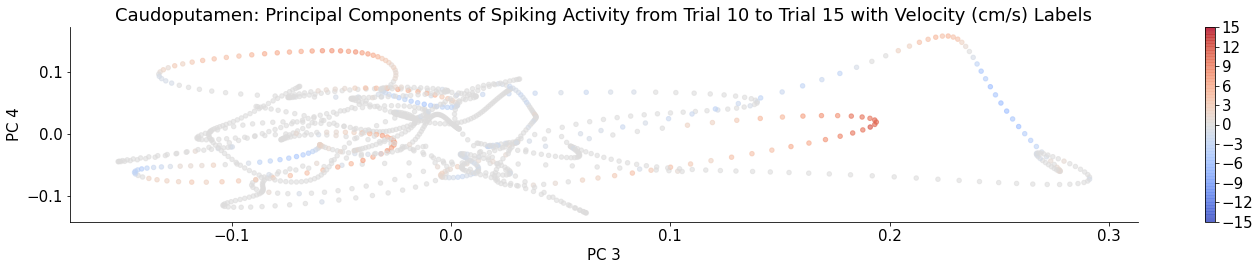

In [ ]:
pcaSpike_wheelvelocity_multiple([[1,2],[2,3],[3,4]],10,5,["CP"],"Caudoputamen")

(306, 943, 250)
(306, 1250)
(1250, 8)


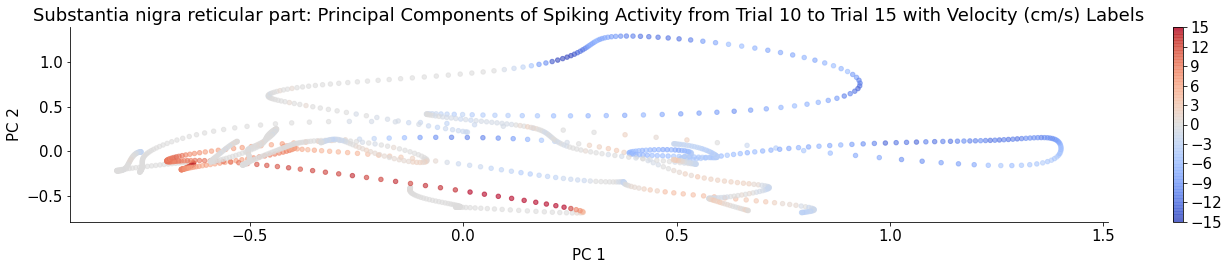

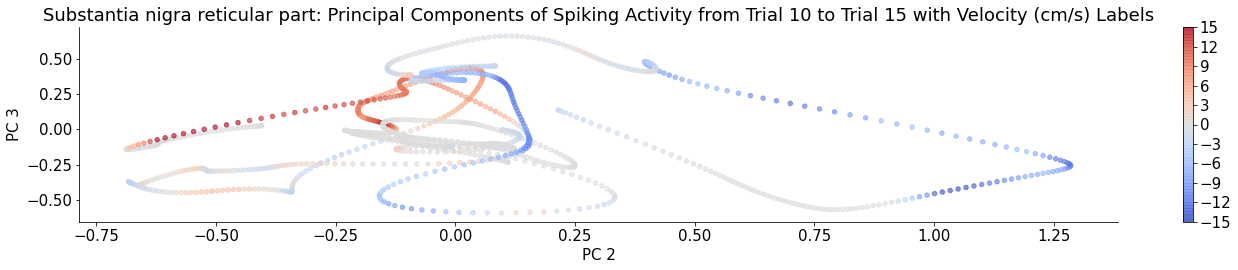

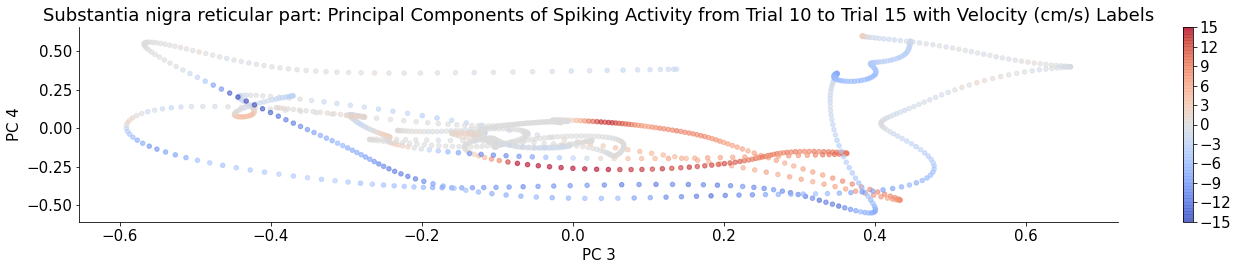

In [ ]:
pcaSpike_wheelvelocity_multiple([[1,2],[2,3],[3,4]],10,5,["SNr"],"Substantia nigra reticular part")

### **PCA with contrast difference labels**

In [ ]:
from sklearn.decomposition import PCA 
from scipy.ndimage.filters import gaussian_filter1d

In [ ]:
dat=alldat[10]
spike_data=dat['spks']
print(spike_data.shape)
print(dat['contrast_right'].shape)
print(dat['contrast_left'].shape)
print(np.unique(dat['contrast_right']))
print(np.unique(dat['contrast_left']))

(857, 342, 250)
(342,)
(342,)
[0.   0.25 0.5  1.  ]
[0.   0.25 0.5  1.  ]


In [ ]:
#smooth data with Gaussian kernel
new_spk_data = np.zeros(spike_data.shape)
#first loop through all the neurons, then loop through all the trials
for i in range(spike_data.shape[0]):
  for j in range(spike_data.shape[1]):
    new_spk_data[i,j,:] = gaussian_filter1d(spike_data[i,j,:].astype('float'), 10)
print(new_spk_data.shape)

#flatten trial dimension
spk_data_reshaped = new_spk_data.reshape(342, 857*250)
#Initializes PCA
pca_model = PCA(n_components=0.8)

#Performs PCA
pca_model.fit(spk_data_reshaped)
scores = pca_model.transform(spk_data_reshaped)
print(scores.shape)

(857, 342, 250)
(342, 35)


In [ ]:
def visualize_components_contrast(component1, component2, labels, show=True):
  plt.figure()
  cmap = plt.cm.get_cmap('OrRd')
  plt.scatter(x=component1, y=component2, c=labels, cmap=cmap,s=20,alpha=0.5)
  plt.xlabel('Component 1')
  plt.ylabel('Component 2')
  plt.title('Dataset 10:Principal Components of Spike Activity with Contrast Level Difference Labels')
  plt.colorbar(ticks=range(10))
  plt.clim(0, 10)
  plt.xlim([-20,5])
  plt.ylim([-10,10])
  if show:
    plt.show()

In [ ]:
# make labels for contrast difference
# multiply original different by 4 in order to make integer
labels_contrast=(np.absolute(dat['contrast_right']-dat['contrast_left']))*4
print(len(dat['contrast_right']))
print(len(dat['contrast_left']))
print(len(labels_contrast))

342
342
342


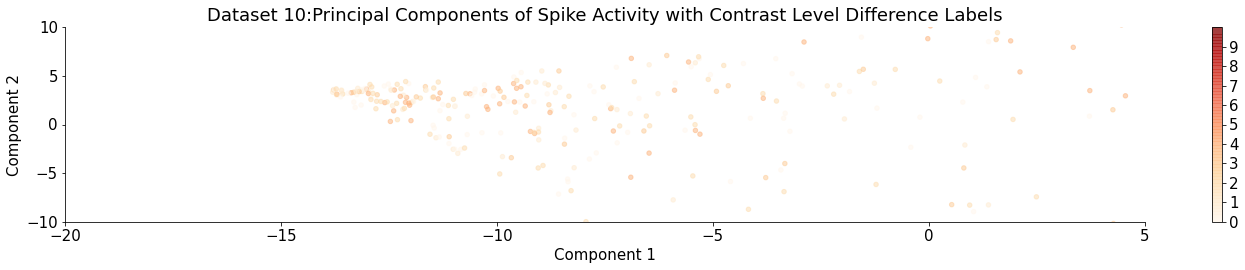

In [ ]:
# Plot the data and reconstruction
visualize_components_contrast(scores[:,0],scores[:,1],labels_contrast)

### **tSNE with wheel velocity labels (focus on one brain area or interaction between 2 brain areas)**

In [ ]:
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
from scipy.ndimage.filters import gaussian_filter1d

In [ ]:
#visualizing function
def visualize_components_velocity_tSNE(component1, component2, labels, trial_num_start,interval,brain_area,brain_area_fullname,show=True):
  plt.figure()
  cmap = plt.cm.get_cmap('coolwarm')
  plt.scatter(x=component1, y=component2, c=labels, cmap=cmap,s=20,alpha=0.6)
  plt.xlabel('Component 1')
  plt.ylabel('Component 2')
  plt.colorbar(ticks=range(-15,18,3))
  plt.clim(-15, 15)
  plt.autoscale()
  plt.title(brain_area_fullname+': tSNE Components of Spiking Activity from Trial '+str(trial_num_start)+" to Trial "+str(trial_num_start+interval)+" with Velocity (cm/s) Labels")
  if show:
    plt.show()

In [ ]:
def tSNE_Spike_wheelvelocity(trial_num_start,interval,brain_area,brain_area_fullname):
  '''
  Run tSNE on spike data in one specific brain area or multiple brain areas
  output a visualization of the first 2 tSNE components with labels of wheel velocity
  '''
  dat=groupByBrains(brain_area) #select a brain area
  spk_data=dat[0]
  speed_data=dat[1]

  #smooth data with Gaussian kernel
  new_spk_data = np.zeros(spk_data.shape)
  #first loop through all the neurons, then loop through all the trials
  for i in range(spk_data.shape[0]):
    for j in range(spk_data.shape[1]):
      new_spk_data[i,j,:] = gaussian_filter1d(spk_data[i,j,:].astype('float'), 10)
  print(new_spk_data.shape)
  #select trials to be included in PCA
  spk_data_bytrial = new_spk_data[:,trial_num_start:(trial_num_start+interval),:]
  spk_data_bytrial = np.reshape(spk_data_bytrial,(spk_data_bytrial.shape[0], spk_data_bytrial.shape[1]*spk_data_bytrial.shape[2]))
  print(spk_data_bytrial.shape)

  # Initializes PCA (run PCA first to make tSNE go faster)
  pca_model = PCA(n_components=2)

  # Performs PCA
  pca_model.fit(spk_data_bytrial.T)
  scores = pca_model.transform(spk_data_bytrial.T)

  # Performs t-SNE
  tsne_model = TSNE(n_components=2, perplexity=30, random_state=2020)
  embed = tsne_model.fit_transform(scores) #try using PC components here
  print(scores.shape)
  print(embed.shape)
  #create velocity labels
  labels_velocity=speed_data[0,trial_num_start:trial_num_start+interval,:]

  # Plot the data 
  visualize_components_velocity_tSNE(embed[:,0],embed[:,1],labels_velocity,trial_num_start,interval,brain_area,brain_area_fullname)

**Call function**

(793, 594, 250)
(793, 1250)
(1250, 2)
(1250, 2)


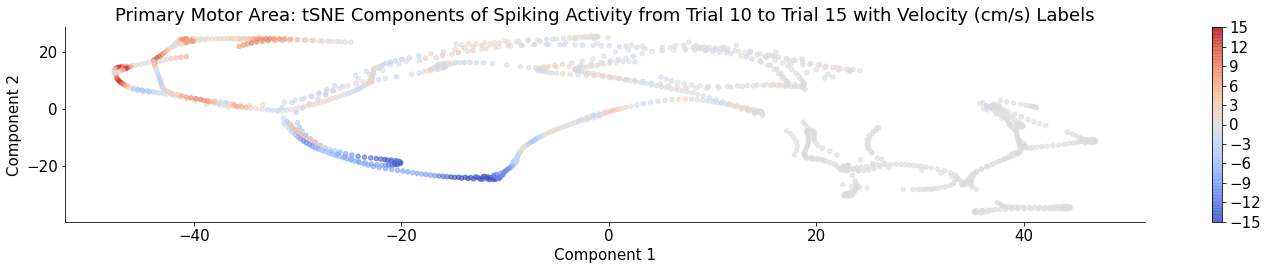

In [ ]:
tSNE_Spike_wheelvelocity(10,5,['MOp'],'Primary Motor Area')

(1215, 1229, 250)
(1215, 1250)
(1250, 2)
(1250, 2)


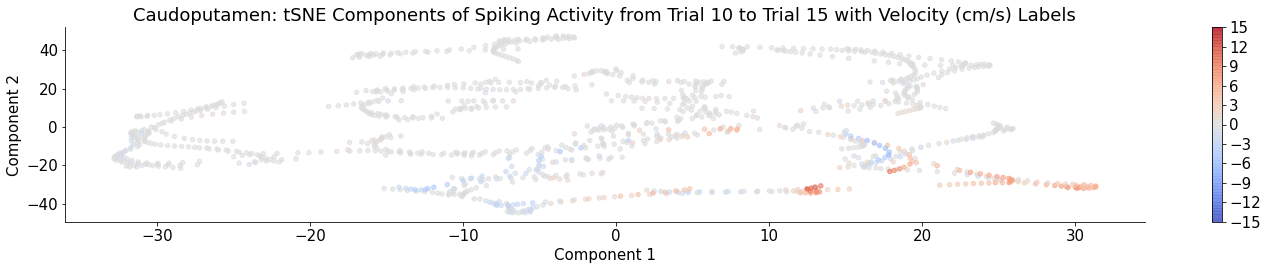

In [ ]:
tSNE_Spike_wheelvelocity(10,5,['CP'],'Caudoputamen')

(306, 943, 250)
(306, 1250)
(1250, 2)
(1250, 2)


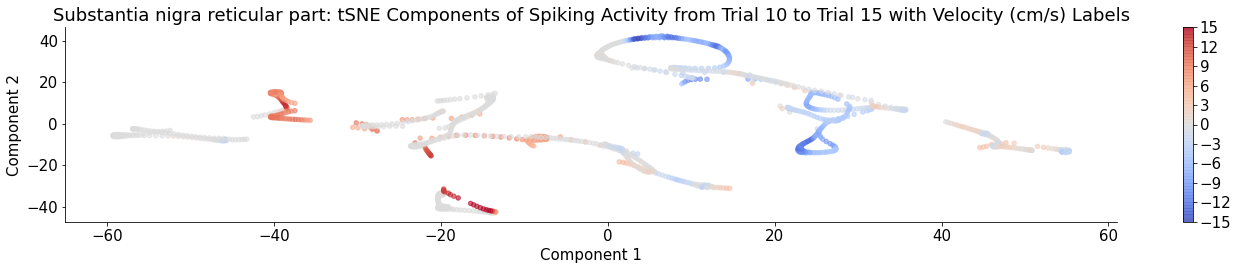

In [ ]:
tSNE_Spike_wheelvelocity(10,5,['SNr'],'Substantia nigra reticular part')

(1118, 3457, 250)
(1118, 1250)
(1250, 2)
(1250, 2)


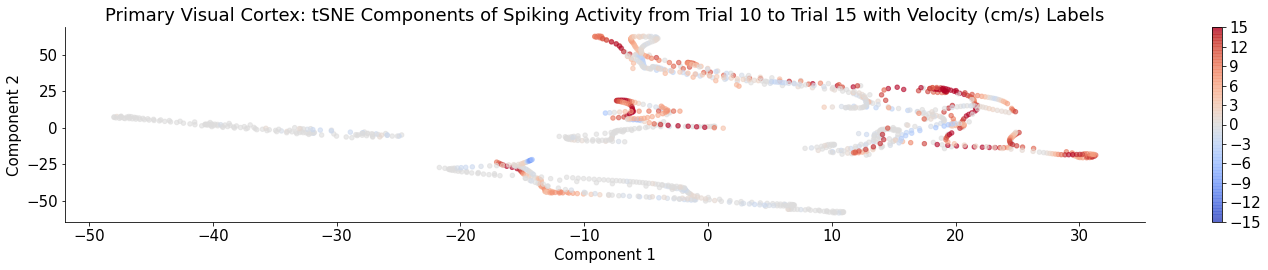

In [ ]:
tSNE_Spike_wheelvelocity(10,5,['VISp'],'Primary Visual Cortex')

**Examine two regions**

(2008, 1823, 250)
(2008, 1250)
(1250, 2)
(1250, 2)


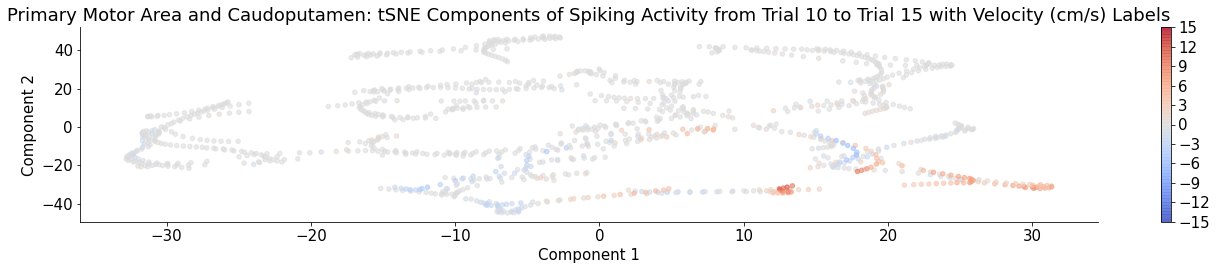

In [ ]:
tSNE_Spike_wheelvelocity(10,5,['MOp','CP'],'Primary Motor Area and Caudoputamen')

(1099, 1537, 250)
(1099, 1250)
(1250, 2)
(1250, 2)


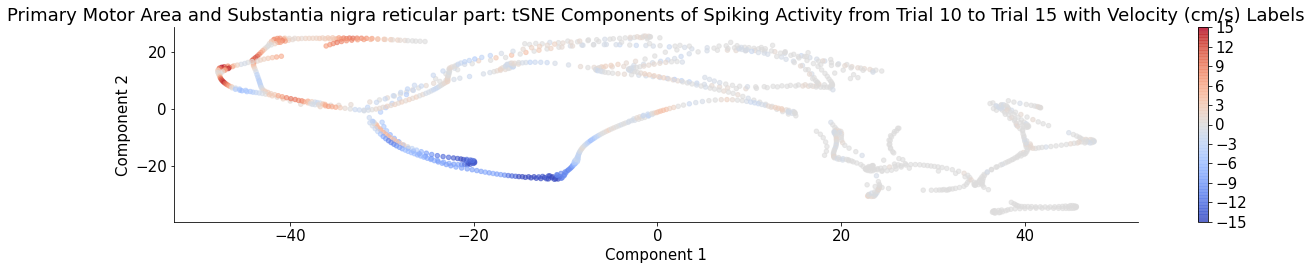

In [ ]:
tSNE_Spike_wheelvelocity(10,5,['MOp','SNr'],'Primary Motor Area and Substantia nigra reticular part')

(1521, 2172, 250)
(1521, 1250)
(1250, 2)
(1250, 2)


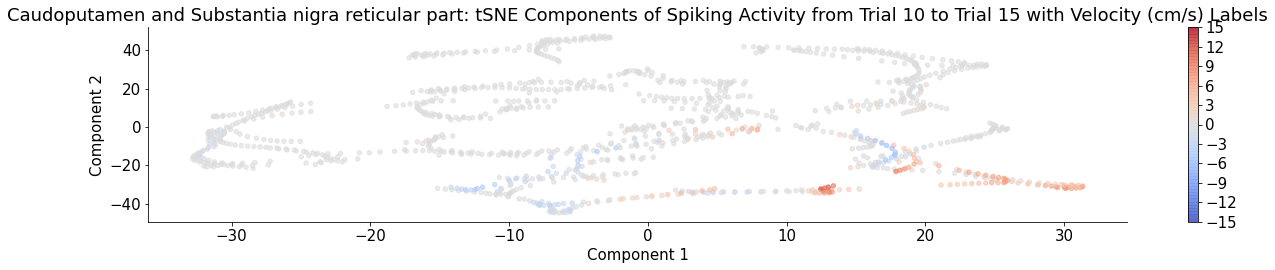

In [ ]:
tSNE_Spike_wheelvelocity(10,5,['CP','SNr'],'Caudoputamen and Substantia nigra reticular part')

### **Multiple Linear Regression (also use PCA to reduce dimension; different from previous section)**

In [ ]:
#@title Importing stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA 
from scipy.ndimage.filters import gaussian_filter1d
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
#@title Compute pca and gaussian filter

def pca_and_gaussian_filter(brainArea):
  # all the data from one specific brain area
  # dat=groupByBrains(['MOp'])
  dat=groupByBrains([brainArea])
  # print(dat[0].shape)
  # print(dat[1].shape)
  n_neurons = dat[0].shape[0]
  n_trials = dat[0].shape[1]
  n_time = dat[0].shape[2]
  original_size = [n_neurons,n_trials,n_time]

  spk_data=dat[0]
  speed_data=dat[1]
  # print(spk_data.shape)

  # new_spk_data = spk_data

  #smooth data with Gaussian kernel
  new_spk_data = np.zeros(spk_data.shape)
  #first loop through all the neurons, then loop through all the trials
  for i in range(spk_data.shape[0]):
    for j in range(spk_data.shape[1]):
      new_spk_data[i,j,:] = gaussian_filter1d(spk_data[i,j,:].astype('float'), 10)

  # print(new_spk_data.shape)

  spk_data_reshaped = new_spk_data.reshape(n_neurons, n_trials*n_time)

  pca_model2 = PCA(0.8)#put a percentage here 
  print(spk_data_reshaped.shape)
  # Performs PCA
  pca_model2.fit(spk_data_reshaped.T)
  pc_components = pca_model2.transform(spk_data_reshaped.T)
  return pc_components, speed_data, original_size

pc_components, speed_data, original_size = pca_and_gaussian_filter("MOp")


(793, 148500)


In [ ]:
#@title **(Version 1)** Taking into account just the **current** neural activity
#use all data from one brain area
wheel_speed=dat[1].reshape(1, n_trials*n_time)
#use one dataset
#wheel_speed=dat['wheel'].reshape(1, n_trials*n_time)

wheel_speed=wheel_speed.T
print(wheel_speed.shape)
#Splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(pc_components, wheel_speed, test_size = 0.3, random_state = 100)

In [ ]:
# @title **(Version 2) Slider Window Time** Taking into account **previous** neural activity

def arrange_data(t_i,t_f,dt_p,pc_components,speed_data,original_size,dis):
  # slider time window
  n_neurons = original_size[0]
  n_trials = original_size[1]
  n_time =    original_size[2]

  padding = np.zeros(shape=(dt_p,pc_components.shape[1]))
  pc_padded = np.vstack((pc_components,padding))
  slider = pc_padded
  for i in range(dt_p):
    slider = np.hstack((slider[:-1],pc_padded[i+1:]))
  X_design = slider[t_i-dis:t_f-dis]
  for i in range(1,n_trials):
    X_design = np.vstack((X_design,slider[(i*n_time)+t_i-dis:(i*n_time)+t_f-dis]))

  #use all data from one brain area
  Y_design = speed_data[0,:,t_i:t_f].reshape(n_trials*(t_f-t_i))
  return X_design, Y_design


t_i=100     # time interval beginning
t_f=150     # time interval end
dt_p=10     # previous steps neural activity
dis=0       # distance for traverse the slider window (negative)
X_design, Y_design = arrange_data(t_i,t_f,dt_p,pc_components,speed_data,original_size,dis)

In [ ]:
# @title Linear Regression
x_train, x_test, y_train, y_test = train_test_split(X_design, Y_design, test_size = 0.3, random_state = 100)
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
# print("Coefficients:",mlr.coef_)

#Prediction of test set
y_pred_mlr= mlr.predict(x_test)


Intercept:  -0.20258701286555925


**Model Evaluation**

R squared: 78.34
Mean Absolute Error: 2.1571803438370383
Mean Square Error: 10.096948579650215
Root Mean Square Error: 3.1775696026444824


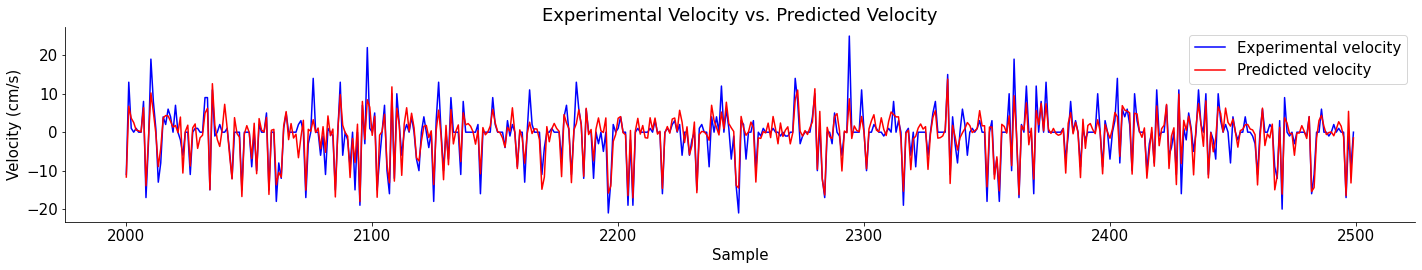

In [ ]:
# @title Metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(X_design,Y_design)*100))             #For slider window time(version 2)
# print('R squared: {:.2f}'.format(mlr.score(pc_components,wheel_speed)*100))   #For May GLM model (version 1)
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

# ploting
beg = 2000
plt.plot(beg+np.arange(500),y_test[beg:beg+500],'b',label = "real speed")
plt.plot(beg+np.arange(500),y_pred_mlr[beg:beg+500],'r',label = "predicted speed")
plt.title("Experimental Velocity vs. Predicted Velocity")
plt.xlabel("Sample")
plt.ylabel("Velocity (cm/s)")
plt.legend(["Experimental velocity","Predicted velocity"],loc="upper right")

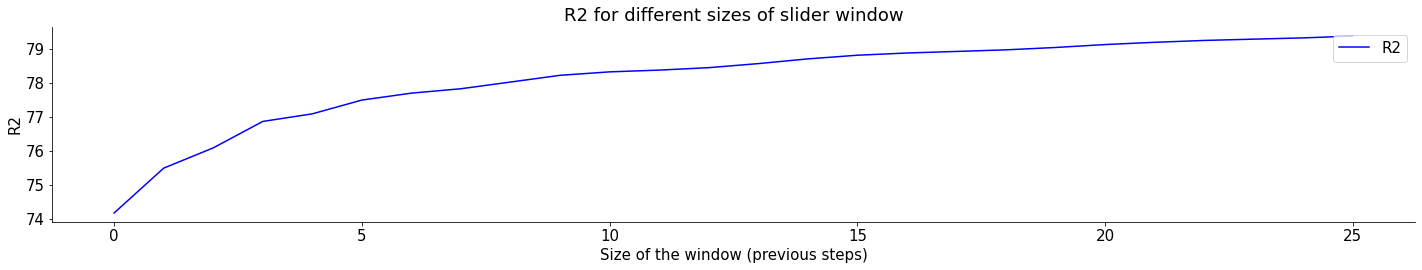

In [ ]:
# @title Slider window size

t_i=100     # time interval beginning
t_f=150     # time interval end
max_dt_size = 25
dis=0
r2_scores = np.zeros(max_dt_size+1)
for dt in range(max_dt_size+1):
  # print(dt)
  X_design, Y_design = arrange_data(t_i,t_f,dt,pc_components,speed_data,original_size,dis)
  x_train, x_test, y_train, y_test = train_test_split(X_design, Y_design, test_size = 0.3, random_state = 100)
  mlr = LinearRegression()  
  mlr.fit(x_train, y_train)
  r2_scores[dt] = mlr.score(X_design,Y_design)*100

plt.plot(np.arange(max_dt_size+1),r2_scores,'b',label = "r square")
plt.title("R2 for different sizes of slider window")
plt.xlabel("Size of the window (previous steps)")
plt.ylabel("R2")
plt.legend(["R2"],loc="upper right")

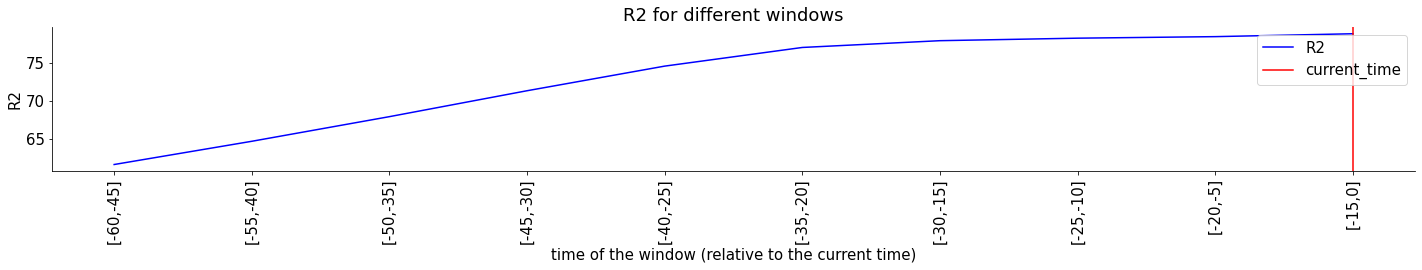

In [ ]:
# @title Slider windows 
t_i=100         # time interval beginning
t_f=150         # time interval end
dt_size = 15    # size of the slider window

#parameters to move the slider window
interv=5        # time interval between slider windows
pre_win=10      # plot n pre_win before the current time
pos_win=0      # plot n pos_win after the current time

if (t_i-(pre_win-1)*interv-dt_size)<0 or (t_f+pos_win*interv)>250:
  raise NotImplementedError("time must be coherent")


r2_scores = np.zeros(pre_win+pos_win)
labels = []
for i in range(pre_win+pos_win):
  print(i)
  dis = (i-pre_win+1)*interv
  X_design, Y_design = arrange_data(t_i,t_f,dt_size,pc_components,speed_data,original_size,dis)
  x_train, x_test, y_train, y_test = train_test_split(X_design, Y_design, test_size = 0.3, random_state = 100)
  mlr = LinearRegression()  
  mlr.fit(x_train, y_train)
  r2_scores[i] = mlr.score(X_design,Y_design)*100
  labels.append("["+str(dis-dt_size)+","+str(dis)+"]")

plt.plot(np.arange(pre_win+pos_win),r2_scores,'b',label = "r square")
plt.xticks(np.arange(pre_win+pos_win),labels, rotation ='vertical')
plt.axvline(x=pre_win-1,color="r")
plt.title("R2 for different windows")
plt.xlabel("time of the window (relative to the current time)")
plt.ylabel("R2")
plt.legend(["R2","current_time"],loc="upper right")

**Compute AIC**


\begin{align}
\mathrm{AIC} = 2K + n \log(\frac{\mathrm{SSE}}{n})
\end{align}

In [ ]:
# Compute SSE
residuals = y_test - y_pred_mlr
sse = np.sum(residuals ** 2)

# Get K
K = x_train.shape[1]
n_train_samples=x_train.shape[0]

# Compute AIC
AIC = 2 * K + n_train_samples * np.log(sse / n_train_samples)
print(AIC)

Dataset 10 (including primary motor area and caudoputamen): 19703

Primary motor area (from all datasets): 33776

## Data Exploration (Part 1)

### Examine Wheel Speed Data

**Create labels for wheel speed in each trial**

In [ ]:
dat=alldat[10]
dat_wheel=dat['wheel'][0,0,:]

#expand the dimension of "dat_wheel" to include an additional row for labels
wheel_label = []
#print(len(wheel_label))
for i in range(len(dat_wheel)):
  if dat_wheel[i]>0:
    wheel_label.append("left choice") #left image has higher contrast; move the image right to middle
  elif dat_wheel[i]<0:
    wheel_label.append("right choice") #right image has higher contrast; move the image left to middle
  else:
    wheel_label.append("Stay") #wheel speed is 0; no image is present
print(len(wheel_label))
dat_wheel_labeled=np.vstack([dat_wheel, wheel_label])
print(dat_wheel_labeled.shape)
print(dat_wheel_labeled[:,100:105])#check code

**Calculate moving average (wheel speed data)**

In [ ]:
# choose a dataset to load
dat=alldat[10]
#number of neurons in this dataset
num_neuron = len(dat['brain_area']) # number of neurons
print(num_neuron)
#show brain areas included in this dataset
print("brain areas: ", np.unique(dat['brain_area'])) 
#show dimensions of wheel speed data
print("dimensions of wheel speed data", dat['wheel'].shape) 

response=dat['response']
# For computing the moving average of wheel rotation 
wheel=dat['wheel'][:,response>=0].mean(axis=(0,1))
dwheel=np.gradient(wheel)
N = 3
cumsum, moving_aves = [0], []

for i, x in enumerate(dwheel, 1):
    cumsum.append(cumsum[i-1] + x)
    if i<N:
        moving_aves.insert(0,0)
    if i>=N:
        moving_ave = (cumsum[i] - cumsum[i-N])/N
        moving_aves.append(moving_ave)

moving_aves=np.asarray(moving_aves)

**Make a histogram of the distribution of wheel speed for one trial**

In [ ]:
#all the wheel speed data in the first trial 
dat_wheel=dat['wheel'][0,0,:]
print(dat_wheel.shape)

#make a histogram to show distribution of wheel speed
plt.hist(dat_wheel, bins=15, histtype="stepfilled")
plt.title("Session 10: Trial 1")
plt.xlabel("Wheel Speed")
plt.ylabel("Count");

**Wheel Speed based on Response Type (left/right/no choice)**

In [ ]:
response=dat['response']
wheel_resp_left=dat['wheel'][:,response>0] #left choice
wheel_resp_right=dat['wheel'][:,response<0] #right choice
wheel_resp_no=dat['wheel'][:,response==0] #no choice

**Left choice**

In [ ]:
print("Left choice median speed: ",np.median(wheel_resp_left[0,:,50:200]))
print("Left choice mean speed: ",np.mean(wheel_resp_left[0,:,50:200]))

**Right choice**

In [ ]:
print("Right choice median speed: ",np.median(wheel_resp_right[0,:,50:200]))
print("Right choice mean speed: ",np.mean(wheel_resp_right[0,:,50:200]))

**No choice**

In [ ]:
print("No choice median speed: ",np.median(wheel_resp_no[0,:,50:200]))
print("No choice mean speed: ",np.mean(wheel_resp_no[0,:,50:200]))

**Histogram of wheel speed based on response type**

**Left choice**

In [ ]:
dat_wheel_resp_left=wheel_resp_left[0,0,50:200]
plt.hist(dat_wheel_resp_left, bins=15, histtype="stepfilled")
plt.title("Session 10: Trial 1 (Left choice)")
plt.xlabel("Wheel Speed")
plt.ylabel("Count");

**Right choice**

In [ ]:
dat_wheel_resp_left=wheel_resp_right[0,0,50:200]
plt.hist(dat_wheel_resp_left, bins=15, histtype="stepfilled")
plt.title("Session 10: Trial 1 (Right choice)")
plt.xlabel("Wheel Speed")
plt.ylabel("Count");

**No choice**

In [ ]:
dat_wheel_resp_left=wheel_resp_no[0,0,50:200]
plt.hist(dat_wheel_resp_left, bins=15, histtype="stepfilled")
plt.title("Session 10: Trial 1 (No choice)")
plt.xlabel("Wheel Speed")
plt.ylabel("Count");

**Check contrast levels**

In [ ]:
print(np.unique(dat['contrast_left']))
print(np.unique(dat['contrast_right']))

## Data Exploration (Part 2): Macroscale

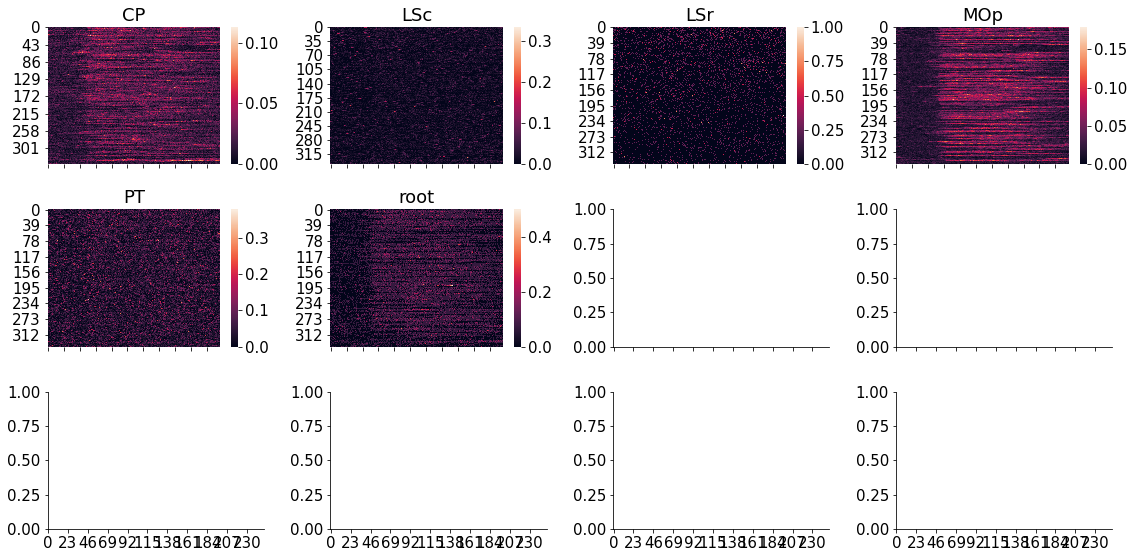

In [ ]:
import seaborn as sns
dat = alldat[10]
brain_area= np.unique(dat["brain_area"])
fig, axes = plt.subplots(3, 4, sharex=True, figsize=(16,8))
i=0
for area in brain_area:
  index = dat["brain_area"]==area
  data =  np.mean(dat['spks'][index], axis=0) 
  #print(data.shape)
  sns.heatmap(data, ax=axes.flat[i]).set_title(area)
  i+=1

fig.show()
print(dat['spks'])

In [ ]:
np.shape(alldat)
dat = alldat[11]
sns.heatmap(dat['spks'][0])
dat['spks'].shape

In [ ]:
import seaborn as sns
np.shape(alldat)
dat = alldat[11]
dt = dat['bin_size'] # binning at 10 ms
NT = dat['spks'].shape[-1]
sns.heatmap(dat['wheel'][0])

In [ ]:
plt.plot(dt * np.arange(NT),  dat['wheel'][:,vis_right>0].mean(axis=(0,1))) # stimulus on the right
plt.plot(dt * np.arange(NT),  dat['wheel'][:,vis_left>0].mean(axis=(0,1))) # no stimulus on the right

In [ ]:
dat = alldat[11]
sns.heatmap(dat['licks'][0])

In [ ]:
plt.plot(dt * np.arange(NT),  dat['licks'][:,vis_right>0].mean(axis=(0,1))) # stimulus on the right
plt.plot(dt * np.arange(NT),  dat['licks'][:,vis_right==0].mean(axis=(0,1))) # n

In [ ]:
dat = alldat[11]
sns.heatmap(dat['face'][0])

In [ ]:
plt.plot(dt * np.arange(NT),  dat['pupil'][:,vis_right>0].mean(axis=(0,1))) # stimulus on the right
plt.plot(dt * np.arange(NT),  dat['pupil'][:,vis_left>0].mean(axis=(0,1))) # no stimulus on the right